# Problema ottimizzazione


Supponiamo di dover costruire $n$ colonne.

Ogni colonna, per essere costruita, deve essere formata da $k$ mattoni.

Sia $M = \{m_1, \dots m_{n*k}\}$ l'insieme dei mattoni a disposizione.

Ciascun mattone è caratterizzato da un altezza $h(m_i) = h_i$ con $i = 1,..., l$. 

La colonna $i$-esima è definita come $C_i \subset M$, i vincoli che la colonna deve rispettare sono formalizzati come segue
$$
    \#C_i = k
$$
$$
    C_i \cap C_j = \empty
$$ 
per ogni $i,j = 1, \dots, n$

L'altezza di una colonna $H(C_i)$ è definita come la somma delle altezze dei mattoni che la compongono
$$
    H(C_i) = \sum_{j \in C_i} h(m_j)
$$

La funzione obiettivo $f$ da minimizzare, è la differenza tra la colonna più alta e la colonna più bassa: 
$$
f(C_1,\dots, C_{n}) = H_{max} -  H_{min} 
$$
dove $C_1,\dots, C_{n}$ è l'inisieme delle $n$ colonne costruite e
$$
    H_{max} =  \max_{C_1,\dots, C_{n}}\Big\{ H(C_i) \Big \}
$$
$$
    H_{min} = \min_{C_1,\dots, C_{n}}\Big\{ H(C_i) \Big\}
$$

Importiamo la classe che implementa un algoritmo genetico per risolvere il problema.

In [2]:
from solver import GeneticBrickSolver

Inizializziamo i parametri dell'algoritmo.

In [3]:
population_size = 9 
mutation_rate=0.1
crossover_rate=0.9
k_elitism = 2
tournament_size = 3
max_generations = 1000

GBS = GeneticBrickSolver(population_size, mutation_rate, crossover_rate, max_generations, tournament_size, k_elitism)

Creiamo un'istanza del problema e risolviamola. Supponiamo di avere 8 colonne, 10 mattoni per colonna ed esattamente $8\times10 = 80$ mattoni con cui costruirle. Le altezze dei mattoni sono valori casuali uniformemente distribuite in $[3,33]$.

In [4]:
import random
columns_per_individual = 8
bricks_per_column = 10
number_of_bricks = columns_per_individual*bricks_per_column
brick_heights = [3+30*random.random() for _ in range(1,number_of_bricks+1)]

GBS.solve(brick_heights, columns_per_individual, bricks_per_column)

Tracciamo un grafico del andamento della migliore soluzione trovata fin ora. Siamo interessati a minimizzare il valore di fitness.

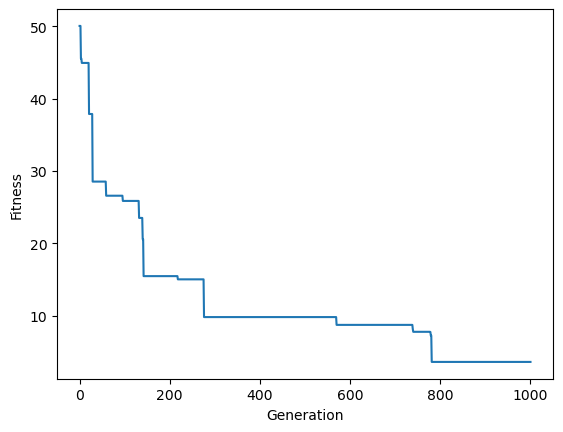

In [5]:
GBS.plot_fitness()

Rappresentiamo i vari individui che appartengono alle successive generazioni. Un individuo è una possibile soluzione del problema ed è caratterizzato dal valore $f$, ovvero la fitness di tale soluzione.

In [6]:
GBS.plot_population()

interactive(children=(IntSlider(value=1, description='generation', max=1000), Output()), _dom_classes=('widget…

Rappresentiamo la migliore soluione trovata.

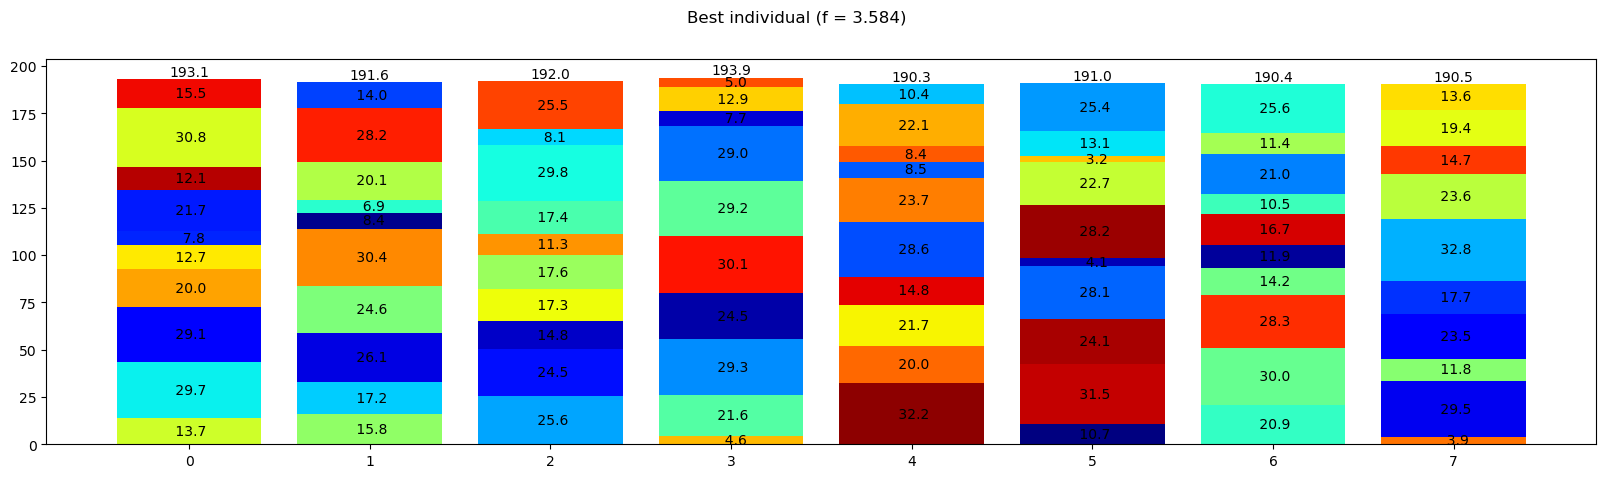

In [7]:
GBS.plot_best_individual()